In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import stats
import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from bokeh.models import BoxZoomTool
from bokeh.plotting import figure, output_notebook, show
import datashader as ds
from datashader.bokeh_ext import InteractiveImage
from functools import partial
from datashader.utils import export_image
from datashader.colors import colormap_select, Greys9, Hot, inferno,Set1
from datashader import transfer_functions as tf
output_notebook()

from tqdm import tqdm_notebook as tqdm
tqdm().pandas()
!jupyter nbextension enable --py widgetsnbextension

Loading BokehJS ...

C:\Users\rachi\anaconda3\envs\interview_environment\lib\site-packages\ipykernel_launcher.py:22: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [5]:
df = pd.read_csv('data/2015_Green_Taxi_Trip_Data.csv')
df

,vendorid,pickup_datetime,dropoff_datetime,Store_and_fwd_flag,rate_code,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,Improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,02/10/2015 08:46:15 AM,02/10/2015 08:59:50 AM,N,1,-73.828262,40.693958,-73.776329,40.645348,1,...,19.0,0.0,0.5,4.75,0.00,NaN,0.3,24.55,1,1.0
1,2,01/09/2015 03:45:22 PM,01/09/2015 03:54:32 PM,N,1,-73.985672,40.669933,-73.998367,40.679829,3,...,7.5,0.0,0.5,1.50,0.00,NaN,0.3,9.80,1,1.0
2,2,01/16/2015 10:07:38 PM,01/16/2015 10:14:25 PM,N,1,-73.892570,40.746658,-73.909294,40.736202,1,...,7.5,0.5,0.5,0.00,0.00,NaN,0.3,8.80,2,1.0
3,2,02/11/2015 08:12:29 PM,02/11/2015 08:16:39 PM,N,1,-73.952034,40.714123,-73.957848,40.710945,1,...,5.0,0.5,0.5,0.00,0.00,NaN,0.3,6.30,2,1.0
4,2,02/26/2015 10:42:27 AM,02/26/2015 10:57:30 AM,N,1,-73.894104,40.750774,-73.912811,40.755722,2,...,11.0,0.0,0.5,0.00,0.00,NaN,0.3,11.80,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19233760,1,08/13/2015 10:02:12 PM,08/13/2015 10:13:14 PM,N,1,-73.939575,40.591824,-73.979851,40.579071,1,...,11.0,0.5,0.5,0.00,0.00,NaN,0.3,12.30,2,1.0
19233761,2,06/02/2015 07:57:14 AM,06/02/2015 07:57:21 AM,N,2,-73.939270,40.805149,-73.939217,40.805218,1,...,52.0,0.0,0.5,0.00,0.00,NaN,0.3,52.80,2,1.0
19233762,2,08/08/2015 08:54:07 PM,08/08/2015 09:03:07 PM,N,1,-73.890251,40.747105,-73.876564,40.759129,1,...,8.0,0.5,0.5,0.00,0.00,NaN,0.3,9.30,2,1.0
19233763,1,04/03/2015 08:42:04 AM,04/03/2015 08:52:49 AM,N,1,-73.941597,40.795589,-73.868660,40.770504,1,...,18.5,0.0,0.5,4.95,5.54,NaN,0.3,29.79,1,1.0


In [6]:
df.columns

Index(['vendorid', 'pickup_datetime', 'dropoff_datetime', 'Store_and_fwd_flag',
       'rate_code', 'Pickup_longitude', 'Pickup_latitude', 'Dropoff_longitude',
       'Dropoff_latitude', 'Passenger_count', 'Trip_distance', 'Fare_amount',
       'Extra', 'MTA_tax', 'Tip_amount', 'Tolls_amount', 'Ehail_fee',
       'Improvement_surcharge', 'Total_amount', 'Payment_type', 'Trip_type'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19233765 entries, 0 to 19233764
Data columns (total 21 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   vendorid               int64  
 1   pickup_datetime        object 
 2   dropoff_datetime       object 
 3   Store_and_fwd_flag     object 
 4   rate_code              int64  
 5   Pickup_longitude       float64
 6   Pickup_latitude        float64
 7   Dropoff_longitude      float64
 8   Dropoff_latitude       float64
 9   Passenger_count        int64  
 10  Trip_distance          float64
 11  Fare_amount            float64
 12  Extra                  float64
 13  MTA_tax                float64
 14  Tip_amount             float64
 15  Tolls_amount           float64
 16  Ehail_fee              float64
 17  Improvement_surcharge  float64
 18  Total_amount           float64
 19  Payment_type           int64  
 20  Trip_type              float64
dtypes: float64(14), int64(4), object(3)
memory usage: 3.

In [8]:
df.isna().sum()

vendorid                        0
pickup_datetime                 0
dropoff_datetime                0
Store_and_fwd_flag              0
rate_code                       0
Pickup_longitude                0
Pickup_latitude                 0
Dropoff_longitude               0
Dropoff_latitude                0
Passenger_count                 0
Trip_distance                   0
Fare_amount                     0
Extra                           0
MTA_tax                         0
Tip_amount                      0
Tolls_amount                    0
Ehail_fee                19233765
Improvement_surcharge           0
Total_amount                    0
Payment_type                    0
Trip_type                      72
dtype: int64

### As Ehail_fee column have more almost 100% of the null values therefore this coloumn could be droped. Although trip_type too have null values but its less then 0.01%, therefore it could be handled by replacing or droping those rows

In [9]:
df.isnull().mean().round(2)*100

vendorid                   0.0
pickup_datetime            0.0
dropoff_datetime           0.0
Store_and_fwd_flag         0.0
rate_code                  0.0
Pickup_longitude           0.0
Pickup_latitude            0.0
Dropoff_longitude          0.0
Dropoff_latitude           0.0
Passenger_count            0.0
Trip_distance              0.0
Fare_amount                0.0
Extra                      0.0
MTA_tax                    0.0
Tip_amount                 0.0
Tolls_amount               0.0
Ehail_fee                100.0
Improvement_surcharge      0.0
Total_amount               0.0
Payment_type               0.0
Trip_type                  0.0
dtype: float64

In [10]:
df = df.loc[:, df.isnull().mean() < .9]
df.isnull().mean().round(2)*100

vendorid                 0.0
pickup_datetime          0.0
dropoff_datetime         0.0
Store_and_fwd_flag       0.0
rate_code                0.0
Pickup_longitude         0.0
Pickup_latitude          0.0
Dropoff_longitude        0.0
Dropoff_latitude         0.0
Passenger_count          0.0
Trip_distance            0.0
Fare_amount              0.0
Extra                    0.0
MTA_tax                  0.0
Tip_amount               0.0
Tolls_amount             0.0
Improvement_surcharge    0.0
Total_amount             0.0
Payment_type             0.0
Trip_type                0.0
dtype: float64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19233765 entries, 0 to 19233764
Data columns (total 20 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   vendorid               int64  
 1   pickup_datetime        object 
 2   dropoff_datetime       object 
 3   Store_and_fwd_flag     object 
 4   rate_code              int64  
 5   Pickup_longitude       float64
 6   Pickup_latitude        float64
 7   Dropoff_longitude      float64
 8   Dropoff_latitude       float64
 9   Passenger_count        int64  
 10  Trip_distance          float64
 11  Fare_amount            float64
 12  Extra                  float64
 13  MTA_tax                float64
 14  Tip_amount             float64
 15  Tolls_amount           float64
 16  Improvement_surcharge  float64
 17  Total_amount           float64
 18  Payment_type           int64  
 19  Trip_type              float64
dtypes: float64(13), int64(4), object(3)
memory usage: 2.9+ GB


In [13]:
df.describe()

,vendorid,rate_code,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Improvement_surcharge,Total_amount,Payment_type
count,1.923376e+07,1.923376e+07,1.923376e+07,1.923376e+07,1.923376e+07,1.923376e+07,1.923376e+07,1.923376e+07,1.923376e+07,1.923376e+07,1.923376e+07,1.923376e+07,1.923376e+07,1.923376e+07,1.923376e+07,1.923376e+07
mean,1.781024e+00,1.099558e+00,-7.382873e+01,4.069085e+01,-7.383247e+01,4.069154e+01,1.374881e+00,2.880014e+00,1.233097e+01,3.523505e-01,4.863494e-01,1.214484e+00,1.132660e-01,2.907562e-01,1.484065e+01,1.548207e+00
std,4.135521e-01,6.464662e-01,2.804967e+00,1.546499e+00,2.740435e+00,1.510833e+00,1.049344e+00,3.017242e+00,1.071811e+01,3.659714e-01,8.921556e-02,3.342661e+00,1.148614e+00,5.369730e-02,2.260808e+02,5.235404e-01
min,1.000000e+00,1.000000e+00,-1.223996e+02,0.000000e+00,-1.223996e+02,0.000000e+00,0.000000e+00,0.000000e+00,-4.990000e+02,-1.000000e+00,-4.950000e+01,-1.000000e+02,-1.816000e+01,-3.000000e-01,-4.990000e+02,1.000000e+00
25%,2.000000e+00,1.000000e+00,-7.395933e+01,4.069925e+01,-7.396709e+01,4.070002e+01,1.000000e+00,1.060000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,7.850000e+00,1.000000e+00
50%,2.000000e+00,1.000000e+00,-7.394505e+01,4.074687e+01,-7.394437e+01,4.074786e+01,1.000000e+00,1.900000e+00,9.500000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.130000e+01,2.000000e+00
75%,2.000000e+00,1.000000e+00,-7.391687e+01,4.080359e+01,-7.390933e+01,4.079250e+01,1.000000e+00,3.640000e+00,1.500000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,3.000000e-01,1.780000e+01,2.000000e+00
max,2.000000e+00,9.900000e+01,0.000000e+00,4.341588e+01,0.000000e+00,4.509433e+01,9.000000e+00,8.304000e+02,8.010500e+03,6.000000e+01,5.354000e+01,2.017730e+03,1.226100e+03,3.000000e-01,9.899704e+05,5.000000e+00


# EDA

Text(0, 0.5, 'Count')

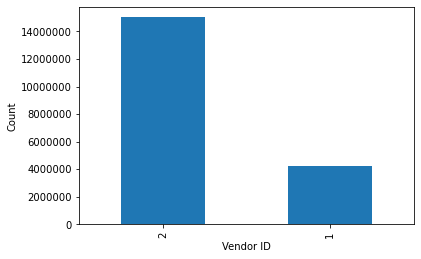

In [10]:
plt = df['vendorid'].value_counts().plot(kind='bar')
plt.ticklabel_format(style='plain', axis='y') # to aviod value count in scienctific notation
plt.set_xlabel("Vendor ID")
plt.set_ylabel("Count")

In [11]:
df['rate_code'].value_counts()

1     18704455
5       446602
2        56816
3        15472
4         9885
6          445
99          90
Name: rate_code, dtype: int64

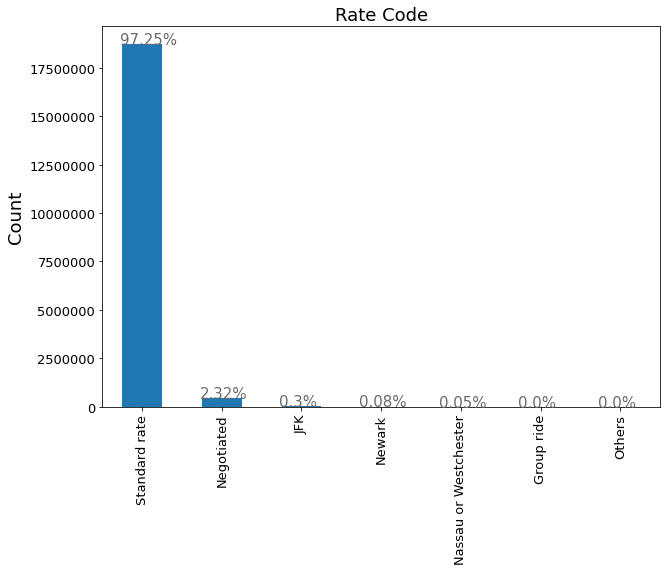

In [12]:
dict_map = {1: 'Standard rate' , 2: 'JFK'  ,3 :'Newark' , 4 : 'Nassau or Westchester' , 5:'Negotiated' , 6: 'Group ride' , 99 :'Others'}
ax = df['rate_code'].map(dict_map).value_counts().plot(kind='bar', figsize=(10,7),
                                       fontsize=13);
ax.set_title("Rate Code", fontsize=18)
ax.set_ylabel("Count", fontsize=18);
ax.ticklabel_format(style='plain', axis='y')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='dimgrey')

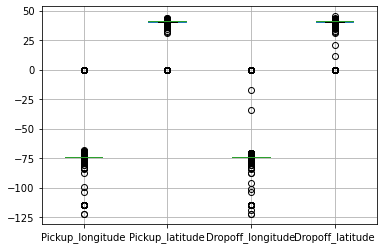

In [13]:
boxplot = df.boxplot(column=['Pickup_longitude', 'Pickup_latitude', 'Dropoff_longitude','Dropoff_latitude'])

In [14]:
def plot_data_points(longitude,latitude,data_frame,focus_point) :
    #plot dimensions
    x_range, y_range = ((-74.14,-73.73), (40.6,40.9))
    plot_width  = int(750)
    plot_height = int(plot_width//1.2)
    export  = partial(export_image, export_path="export", background="black")
    fig = figure(background_fill_color = "black")    
    #plot data points
    cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height,
                    x_range=x_range, y_range=y_range)
    agg = cvs.points(data_frame,longitude,latitude,
                      ds.count(focus_point))
    img = tf.shade(agg, cmap= Hot, how='eq_hist')
    image_xpt  =  tf.dynspread(img, threshold=0.5, max_px=4)
    return export(image_xpt,"NYCT_hot")


## Pickup location by passenger count

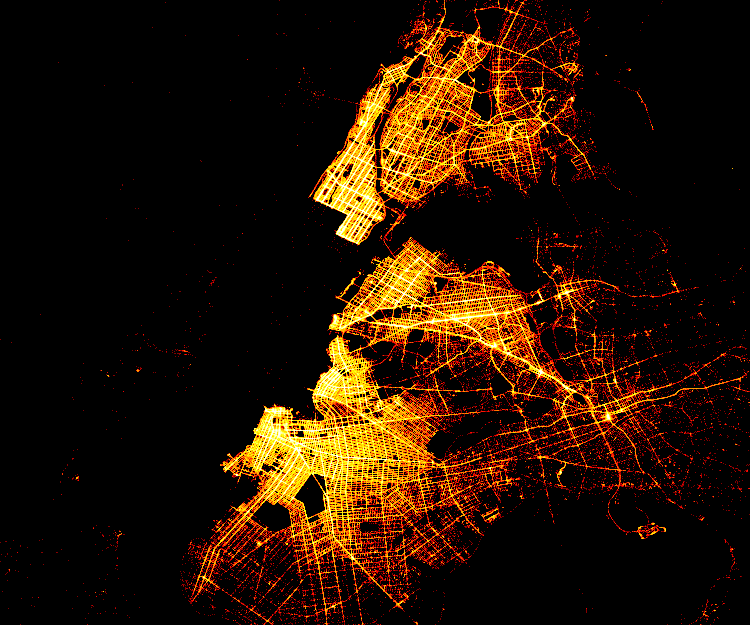

In [15]:
plot_data_points('Pickup_longitude', 'Pickup_latitude',df,"Passenger_count")

## Drop off locations by passenger count

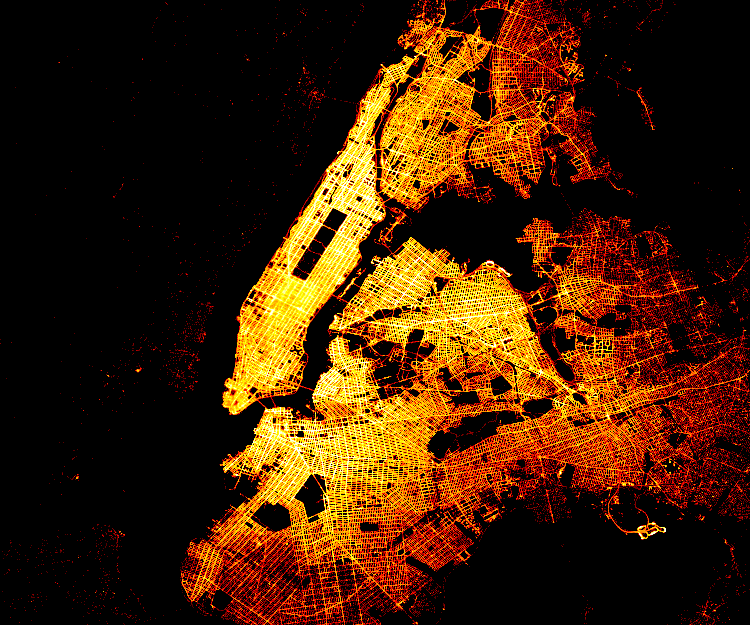

In [16]:
plot_data_points('Dropoff_longitude', 'Dropoff_latitude',df,"Passenger_count")

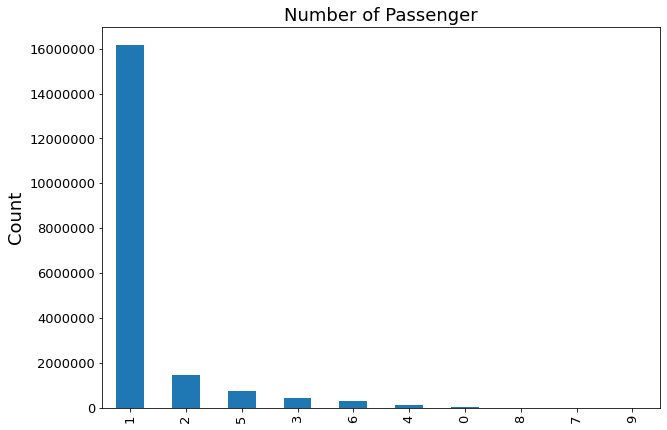

In [17]:
ax = df['Passenger_count'].value_counts().plot(kind='bar', figsize=(10,7),
                                       fontsize=13)
ax.set_title("Number of Passenger", fontsize=18)
ax.set_ylabel("Count", fontsize=18);
ax.ticklabel_format(style='plain', axis='y')


In [23]:
ax = df['Trip_distance'].value_counts()

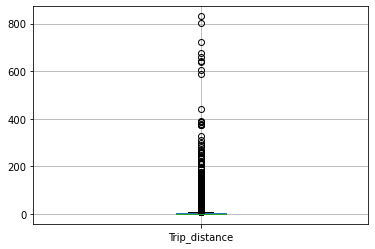

In [20]:
boxplot = df.boxplot(column=['Trip_distance'])

In [21]:
df['Trip_distance'].value_counts()

0.00      273837
0.90      224301
1.00      223025
0.80      215611
1.10      213173
           ...  
121.37         1
118.12         1
106.38         1
108.62         1
43.99          1
Name: Trip_distance, Length: 5383, dtype: int64

### lets see in green taxi what's the average trip user take

#### above plot shows, most of the users just tend to under 100 - 150 miles

In [ ]:
# temp_df =df.loc[:10]
temp_df = df.loc[:,['pickup_datetime']].groupby(['pickup_datetime'], as_index = False).count()
temp_df
# tdf = pd.DataFrame(temp_df, index=temp_df.index, columns=['pickup_datetime','dropoff_datetime'])
# tdf = tdf.cumsum()
# plt.figure()
# tdf.plot()